In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
dataTypes = {
    "disbursed_amount": np.float64,
    "asset_cost": np.float64,
    "ltv": np.float64,
    "branch_id": np.object,
    "supplier_id": np.object,
    "manufacturer_id": np.object,
    "Current_pincode_ID": np.object,
    "State_ID": np.object,
    "Employee_code_ID": np.object,
    "Aadhar_flag": np.uint8,
    "PAN_flag": np.uint8,
    "VoterID_flag": np.uint8,
    "Driving_flag": np.uint8,
    "PRI.NO.OF.ACCTS": np.int64,
    "PRI.ACTIVE.ACCTS": np.int64,
    "PRI.OVERDUE.ACCTS": np.int64,
    "PRI.CURRENT.BALANCE ": np.float64,
    "PRI.SANCTIONED.AMOUNT": np.float64,
    "PRI.DISBURSED.AMOUNT": np.float64,
    "PRIMARY.INSTAL.AMT": np.float64,
    "NEW.ACCTS.IN.LAST.SIX.MONTHS": np.int64,
    "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS": np.int64,
    "AVERAGE.ACCT.AGE": np.int64,
    "CREDIT.HISTORY.LENGTH": np.int64,
    "NO.OF_INQUIRIES": np.uint8,
    "Sanctioned": np.float64,
    "AgeAtDisbursal": np.float64,
    "TOTAL.ACTIVE.ACCTS": np.int64,
    "TOTAL.CURRENT.BALANCE": np.float64,
    "TOTAL.DISBURSED.AMOUNT": np.int64,
    "TOTAL.NO.OF.ACCTS": np.int64,
    "TOTAL.OVERDUE.ACCTS": np.int64,
    "TOTAL.CLEAN.ACCTS": np.int64,
    "NO.OF.ACC.BF.SIX.MONTH": np.int64,
    "OVERDUE.ACC.BF.SIX.MONTHS": np.int64,
    "TOTAL.DEACTIVE.ACCTS": np.int64,
    "TOTAL.INSTL.AMOUNT": np.float64,
    "TOTAL.CLEARED.ACCTS": np.int64,
    "Not_Scored": np.uint8,
    "No_History": np.uint8,
    "Very_Low_Risk": np.uint8,
    "Low_Risk": np.uint8,
    "Medium_Risk": np.uint8,
    "Very_High_Risk": np.uint8,
    "Employment.Type_Other": np.uint8,
    "Employment.Type_Salaried": np.uint8,
    "Employment.Type_Self employed": np.uint8,
    "PERFORM_CNS.SCORE_0": np.uint8,
    "PERFORM_CNS.SCORE_3": np.uint8,
    "PERFORM_CNS.SCORE_4": np.uint8,
    "PERFORM_CNS.SCORE_5": np.uint8,
    "PERFORM_CNS.SCORE_6": np.uint8,
    "PERFORM_CNS.SCORE_7": np.uint8,
    "PERFORM_CNS.SCORE_8": np.uint8
}

#Read the input CSV data set
X_train = pd.read_csv("data/X_train.csv", dtype=dataTypes)
X_test = pd.read_csv("data/X_test.csv", dtype=dataTypes)
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

In [3]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

c:\applications\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\applications\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\applications\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  """


In [ ]:
# Create the random grid
random_grid = {'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)],
              'weights': ["uniform","distance"]}

In [7]:
## This line instantiates the model. 
knn = KNeighborsClassifier()
knn_random = RandomizedSearchCV(estimator=knn,
                               param_distributions=random_grid,
                               n_iter = 10,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               scoring='roc_auc',
                               n_jobs=-1)

## Fit the model on your training data.
knn_random.fit(X_train, y_train.values.ravel()) 
knn_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 638.4min finished


{'weights': 'distance', 'n_neighbors': 83}

In [12]:
model = KNeighborsClassifier(n_neighbors=83, weights='distance')
model.fit(X_train, y_train.values.ravel()) 
predict_prob = model.predict_proba(X_test)

In [13]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, predict_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
print("ROC AUC Score: ", roc_auc)

ROC AUC Score:  0.6259073431674169


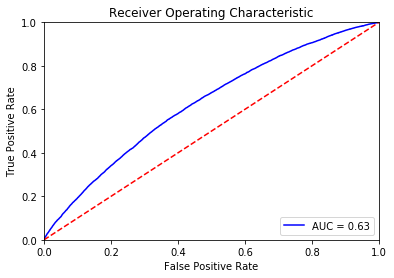

In [14]:
# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()